In [175]:
'''
The following code for downloading, importing and displaying the Fashion MNIST dataset is adapted
from ChatGPT, accessed February 27, 2024
'''
import numpy as np
import requests
import gzip
import os
from matplotlib import pyplot as plt
import random
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.model_selection import train_test_split


def display_img(i):
    first_image = test_images[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.title(test_labels[i])
    plt.show()
    

def download_fashion_mnist(url, file_name):
    # Check if file already exists
    if not os.path.exists(file_name):
        # Download the file
        r = requests.get(url)
        with open(file_name, 'wb') as f:
            f.write(r.content)

def load_fashion_mnist(image_file, label_file):
    # Read image file
    with gzip.open(image_file, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Read label file
    with gzip.open(label_file, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return images, labels

# URLs for Fashion MNIST dataset
image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz'
label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz'

# File names to save the downloaded files
image_file = 'train-images-idx3-ubyte.gz'
label_file = 'train-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(image_url, image_file)
download_fashion_mnist(label_url, label_file)

# Load Fashion MNIST dataset
train_images, train_labels = load_fashion_mnist(image_file, label_file)

# URLs for Fashion MNIST test dataset
test_image_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz'
test_label_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz'

# File names to save the downloaded files for test dataset
test_image_file = 't10k-images-idx3-ubyte.gz'
test_label_file = 't10k-labels-idx1-ubyte.gz'

# Download Fashion MNIST dataset
download_fashion_mnist(test_image_url, test_image_file)
download_fashion_mnist(test_label_url, test_label_file)

# Load Fashion MNIST dataset
test_images, test_labels = load_fashion_mnist(test_image_file, test_label_file)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


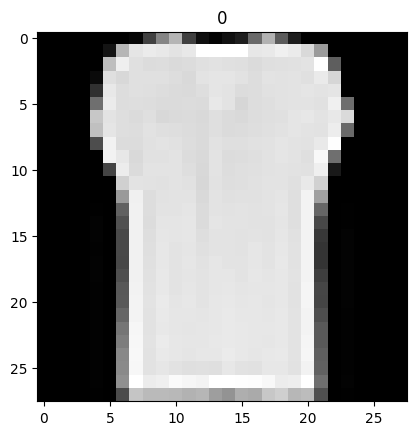

In [229]:
#Display Random Image
display_img(random.randint(0, len(test_images)-1))

In [111]:
#Image Statistics

stats = Counter(train_labels)
print("Training Images Statistics:")
for l, c in stats.items():
    print(f"Class {l}: {c} images")
print()
stats = Counter(test_labels)
print("Test Images Statistics")
for l, c in stats.items():
    print(f"Class {l}: {c} images")

Training Images Statistics:
Class 9: 6000 images
Class 0: 6000 images
Class 3: 6000 images
Class 2: 6000 images
Class 7: 6000 images
Class 5: 6000 images
Class 1: 6000 images
Class 6: 6000 images
Class 4: 6000 images
Class 8: 6000 images

Test Images Statistics
Class 9: 1000 images
Class 2: 1000 images
Class 1: 1000 images
Class 6: 1000 images
Class 4: 1000 images
Class 5: 1000 images
Class 7: 1000 images
Class 3: 1000 images
Class 8: 1000 images
Class 0: 1000 images


In [189]:
# Getting Started

def knn_classifier(k, X_train, y_train, w='uniform'):
    knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    knn.fit(X_train, y_train)
    return knn

train_size = 25
k = 3

# Ravel images
train_ravel = train_images.reshape(train_images.shape[0], -1)
test_ravel = test_images.reshape(test_images.shape[0], -1)

# Normalize
training_norm = train_ravel / np.max(train_ravel)
test_norm = test_ravel / np.max(test_ravel)

knn = knn_classifier(k, training_norm[:train_size], train_labels[:train_size])
test_predicted = knn.predict(test_norm[:train_size])
print("KNN Class")
print(test_predicted)
print("Correct Class")
print(test_labels[:train_size])

accuracy = accuracy_score(test_predicted, test_labels[:train_size])
print("Accuracy:", accuracy)


KNN Class
[5 2 1 1 3 0 0 0 4 7 2 5 7 0 2 0 0 2 5 0 0 7 7 5 1]
Correct Class
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1]
Accuracy: 0.36


In [147]:
# Performance Metrics
def compute_accuracy(test_pairs, num_classes):
    accuracy = sum([pair[0] == pair[1] for pair in test_pairs])
    total = len(test_pairs)
    return accuracy/total

def compute_per_class_accuracy(test_pairs, num_classes):
    total_accuracy = []
    for i in range(num_classes):
        test_classes = [pair[0] == i for pair in test_pairs]
        accuracy = sum([pair[0] == i and pair[0] == pair[1] for pair in test_pairs])/ sum(test_classes)
        total_accuracy.append(accuracy)
    return total_accuracy

def compute_confusion_matrix(test_pairs, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    for t in test_pairs:
        confusion_matrix[t[0]][t[1]] += 1
    return confusion_matrix


In [148]:
'''
Test code for error metrics. Leave this unchanged.
'''
test_pairs = [
    (1, 1),
    (1, 4),
    (0, 0),
    (0, 2),
    (3, 1),
    (4, 2),
    (4, 4),
    (2, 2),
    (2, 2),
    (3, 3),
    (4, 0),
    (4, 4),
    (1, 1),
    (0, 0),
    (0, 2),
    (1, 4),
    (1, 1),
    (0, 0),
    (0, 1),
    (2, 3),
]

num_classes = 5
accuracy = compute_accuracy(test_pairs, num_classes)
print(f'accuracy: {accuracy:.2f}')

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()

accuracy: 0.55

Per class accuracy
0: 0.50
1: 0.60
2: 0.67
3: 0.50
4: 0.50

Confusion matrix
 0:  3  1  2  0  0
 1:  0  3  0  0  2
 2:  0  0  2  1  0
 3:  0  1  0  1  0
 4:  1  0  1  0  2


In [204]:
# Tune the k-NN Classifier
test_size = 1000
k = 5

# w = 'uniform'
w = 'distance'

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=test_size, random_state=1)

# Ravel images
train_ravel = X_train.reshape(X_train.shape[0], -1)
test_ravel = X_valid.reshape(X_valid.shape[0], -1)

# Normalize
training_norm = train_ravel / np.max(train_ravel)
test_norm = test_ravel / np.max(test_ravel)

knn = knn_classifier(k, training_norm, y_train)
test_predicted = knn.predict(test_norm)


test_pairs = [(test_predicted[i], y_valid[i]) for i in range(len(test_predicted))]
accuracy = compute_accuracy(test_pairs, num_classes)
print("Accuracy:", accuracy)

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()



Accuracy: 0.849

Per class accuracy
0: 0.76
1: 0.99
2: 0.70
3: 0.86
4: 0.75
5: 0.99
6: 0.68
7: 0.89
8: 0.97
9: 0.91

Confusion matrix
 0: 84  1  1  3  0  0 21  0  1  0
 1:  0 94  0  0  0  0  0  0  1  0
 2:  2  1 78  0 17  0 12  0  1  0
 3:  3  2  2 96  3  0  4  0  2  0
 4:  0  0 11  2 71  0  9  0  2  0
 5:  0  0  0  0  0 92  0  1  0  0
 6:  9  0  6  1  5  1 48  0  1  0
 7:  0  0  0  0  0  8  0 105  0  5
 8:  0  0  0  1  0  0  2  0 84  0
 9:  0  0  0  0  0  8  0  2  0 97


In [233]:
# Final Test
# Apply the tuned classifier to the 10,000 images in the test set.

num_classes = 10

# Ravel images
test_ravel = test_images.reshape(test_images.shape[0], -1)

# Normalize
test_norm = test_ravel / np.max(test_ravel)
test_predicted = knn.predict(test_norm)

test_pairs = [(test_predicted[i], test_labels[i]) for i in range(len(test_predicted))]
accuracy = compute_accuracy(test_pairs, num_classes)
print("Accuracy:", accuracy)

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()



Accuracy: 0.8549

Per class accuracy
0: 0.77
1: 0.99
2: 0.73
3: 0.90
4: 0.79
5: 0.99
6: 0.66
7: 0.88
8: 0.97
9: 0.90

Confusion matrix
 0: 856  8 25 43  2  1 177  0  2  0
 1:  1 968  2  7  1  0  1  0  0  0
 2: 17  4 817 15 127  0 134  0 10  0
 3: 16 12 11 863 27  0 23  0  3  0
 4:  3  4 77 39 768  0 78  0  7  0
 5:  1  0  0  0  0 821  0  3  0  2
 6: 99  3 68 30 74  5 574  0 16  1
 7:  1  0  0  0  0 98  0 961  7 30
 8:  6  1  0  3  1  1 13  0 954  0
 9:  0  0  0  0  0 74  0 36  1 967


#### Discuss Your Results
_Add a brief discussion of your training and test results. What classes are easiest to recognize?
What are hardest? What are the easiest to confused? What surprised you about the results?
What parameter settings are most important?_

**Easiest to Recognize:** Classes 1, 5, and 8 are the easiest to recognize, with accuracies of 0.98 or higher.

**Hardest to Recognize:** Classes 0, 2, and 6 are the harderest to recognize, with accuracies of 0.75 or lower.

**Easiest to Confuse:** Class 0 and 6 have the most misclassifications between them in the confusion matrix.

**Surprising Results:** It's surprising that class 5 has almost perfect accuracy because class 5 is a sandle, which seems like it could be easily confused with a sneaker class.

**Most Important Parameter Settings:** The choice of k significantly impacts the classifier's performance. Changing k by 1 can increase/decrease performance by approximatly 1%.


In [251]:
#Additional 6270 Component
from sklearn.decomposition import PCA


# Ravel images
train_ravel = train_images.reshape(train_images.shape[0], -1)
test_ravel = test_images.reshape(test_images.shape[0], -1)

# Normalizes
training_norm = train_ravel / np.max(train_ravel)
test_norm = test_ravel / np.max(test_ravel)


m = 100
pca = PCA(n_components=m)
pca.fit(training_norm)
training_norm = pca.transform(training_norm)
test_norm = pca.transform(test_norm)


knn = knn_classifier(k, training_norm, train_labels)
test_predicted = knn.predict(test_norm)


test_pairs = [(test_predicted[i], test_labels[i]) for i in range(len(test_predicted))]
accuracy = compute_accuracy(test_pairs, num_classes)
print("Accuracy:", accuracy)

per_class_accuracy = compute_per_class_accuracy(test_pairs, num_classes)
print()
print('Per class accuracy')
for i, acc in enumerate(per_class_accuracy):
    print(f'{i}: {acc:4.2f}')

cm = compute_confusion_matrix(test_pairs, num_classes)
print(f'\nConfusion matrix')
for i in range(num_classes):
    print(f'{i:2d}:', end='')
    for j in range(num_classes):
        print(f' {cm[i, j]:2d}', end='')
    print()



Accuracy: 0.862

Per class accuracy
0: 0.79
1: 0.99
2: 0.74
3: 0.90
4: 0.76
5: 0.99
6: 0.67
7: 0.91
8: 0.97
9: 0.92

Confusion matrix
 0: 840  7 21 35  1  0 160  0  3  0
 1:  0 969  2  7  2  0  2  0  0  0
 2: 14  5 796 12 114  0 122  0  6  0
 3: 21 13 11 873 27  0 26  0  4  0
 4:  4  4 98 41 780  0 90  0  5  0
 5:  1  0  0  0  0 889  0  7  2  3
 6: 110  1 71 28 72  0 589  0 10  0
 7:  1  0  0  0  0 62  0 953  5 29
 8:  9  1  1  4  4  2 11  0 964  1
 9:  0  0  0  0  0 47  0 40  1 967
